# Insurance Quote Sale Prediction

### Author: Sumam Jose

## Problem Statement: 

Explore and analyse the dataset and build a model to predict quote sales. The dataset to be used is that of quotes for motor insurance returned by Hastings Direct.

In [1]:
# Import the required libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from datetime import datetime
from sklearn.feature_selection import mutual_info_classif

In [2]:
# Load the dataset to be used for analysis.
data = pd.read_csv(r'C:\Users\sumam\OneDrive\Desktop\Hastings Direct Task\Assessment_Dataset.csv')

# Display the first 5 rows of the dataset.
data.head()

,Driver_Age,Vehicle_Value,Tax,Price,Vehicle_Mileage,Credit_Score,Licence_Length_Years,Date,Marital_Status,Sale
0,56.0,8000.0,28.163417,563.268338,9000.0,358.945535,4.635140,01/01/2015,S,0
1,41.0,5000.0,12.652659,253.053188,8000.0,552.668993,7.137831,01/01/2015,M,0
2,33.0,7000.0,17.939741,358.794829,8000.0,438.785405,9.027053,01/01/2015,M,0
3,37.0,6000.0,12.907017,258.140333,7000.0,329.121934,8.873923,01/01/2015,M,0
4,21.0,8000.0,19.335872,386.717436,6000.0,519.575170,0.927578,01/01/2015,M,0


## Exploratory Data Analysis:

Exploratory data analysis can be considered as the process of examining the data to discover any hidden patterns or relationships, to identify the data abnormalities and to get an idea about the general data distribution using statistical and graphical methods.

In [3]:
# Display the number of rows and columns of the dataset.
data.shape

(50000, 10)

The dataset consists of 50000 rows and 10 columns.

In [4]:
# Display the general information and datatypes of the variables in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Driver_Age            49506 non-null  float64
 1   Vehicle_Value         49491 non-null  float64
 2   Tax                   49519 non-null  float64
 3   Price                 49504 non-null  float64
 4   Vehicle_Mileage       49464 non-null  float64
 5   Credit_Score          49478 non-null  float64
 6   Licence_Length_Years  49508 non-null  float64
 7   Date                  50000 non-null  object 
 8   Marital_Status        49512 non-null  object 
 9   Sale                  50000 non-null  int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 3.8+ MB


- This indicates that 7 variables are of the datatype float, 2 variables are of the datatype object and 1 variable is of the datatype int. That is, 'Date' and 'Marital_Status' are string variables and rest are numeric. 
- Except 'Date' and 'Sale', rest of the variables contain missing values and hence imputation techniques has to be used to deal with the missing data.

In [5]:
# Check for missing values.

# To display the number of missing values in each variable of the dataset.
print ("The number of missing values in the dataset are listed below:")
print (data.isna().sum())

# To display the total number of missing values in the whole dataset.
print ("The total number of missing values in the dataset is", data.isna().sum().sum())

The number of missing values in the dataset are listed below:
Driver_Age              494
Vehicle_Value           509
Tax                     481
Price                   496
Vehicle_Mileage         536
Credit_Score            522
Licence_Length_Years    492
Date                      0
Marital_Status          488
Sale                      0
dtype: int64
The total number of missing values in the dataset is 4018


### Measures of Center and Spread

Measures of Center includes Mean, Median and Mode & Measures of Spread includes Range, Quantiles, IQR (InterQuartile Range), Percentiles, Variance and Standard Deviation.

In [6]:
# Separate feature variables of the dataset into 'features' and target/ label variable of the dataset into 'target'.

# Features.
features = data[data.columns[0:9]]
print ('Feature variables of the dataset are: \n', features.head())

# Target.
target = data[data.columns[9:]]
print ('Target variable of the dataset is: \n', target.head())

Feature variables of the dataset are: 
    Driver_Age  Vehicle_Value        Tax       Price  Vehicle_Mileage  \
0        56.0         8000.0  28.163417  563.268338           9000.0   
1        41.0         5000.0  12.652659  253.053188           8000.0   
2        33.0         7000.0  17.939741  358.794829           8000.0   
3        37.0         6000.0  12.907017  258.140333           7000.0   
4        21.0         8000.0  19.335872  386.717436           6000.0   

   Credit_Score  Licence_Length_Years        Date Marital_Status  
0    358.945535              4.635140  01/01/2015              S  
1    552.668993              7.137831  01/01/2015              M  
2    438.785405              9.027053  01/01/2015              M  
3    329.121934              8.873923  01/01/2015              M  
4    519.575170              0.927578  01/01/2015              M  
Target variable of the dataset is: 
    Sale
0     0
1     0
2     0
3     0
4     0


In [7]:
# Display the general summary statistics for numeric features in the dataset.
features.describe()

,Driver_Age,Vehicle_Value,Tax,Price,Vehicle_Mileage,Credit_Score,Licence_Length_Years
count,49506.000000,49491.000000,49519.000000,49504.000000,49464.000000,49478.000000,49508.000000
mean,29.800469,8455.699016,48.501812,552.212188,6997.007925,496.299344,5.826738
std,7.517675,1978.902770,17.736129,136.645548,1358.295284,963.420343,3.291092
min,18.000000,2000.000000,2.424954,38.520108,1000.000000,55.887237,-0.346291
25%,24.000000,7000.000000,33.047127,456.627040,6000.000000,346.238968,2.896016
50%,29.000000,8000.000000,50.075895,560.945713,7000.000000,400.260551,6.460895
75%,35.000000,10000.000000,62.701611,650.643347,8000.000000,455.128115,8.366937
max,74.000000,15000.000000,102.645206,1026.452055,13000.000000,9999.000000,16.370415


- This command displays the total count, mean, standard deviation, minimum value, 25th percentile, 50th percentile, 75th percentile and maximum value of numeric features in the dataset.

In [8]:
# Calculate the median, range, quantiles, IQR and variance for the numeric features in the dataset rounded to 4 decimal places.

# Fetch the numeric features in the dataset.
# Numeric feature names.
numeric_features = features.select_dtypes([np.number]).columns
print ('The numeric features in the dataset are: \n', numeric_features)
# Numeric feature data.
numeric_data = features[features.select_dtypes([np.number]).columns]

# Tabulate the results.
table = []
for i in range(0, len(numeric_data.columns)):
    median = np.round(numeric_data.iloc[:,i].median(), decimals=4)
    variable_range = np.round(max(numeric_data.iloc[:,i]) - min(numeric_data.iloc[:,i]), decimals=4)
    quantiles = np.round([numeric_data.iloc[:,i].quantile(0), 
                          numeric_data.iloc[:,i].quantile(0.25), 
                          numeric_data.iloc[:,i].quantile(0.50), 
                          numeric_data.iloc[:,i].quantile(0.75), 
                          numeric_data.iloc[:,i].quantile(1)], decimals=4)
    IQR = np.round(numeric_data.iloc[:,i].quantile(0.75) - numeric_data.iloc[:,i].quantile(0.25), decimals=4)
    variance = np.round(numeric_data.iloc[:,i].var(), decimals=4)
    table.append([numeric_data.columns[i], median, variable_range, quantiles, IQR, variance])
    
# Print the results.
print(tabulate(table, headers=['Variable', 'Median', 'Range', 'Quantiles', 'IQR', 'Variance']))

The numeric features in the dataset are: 
 Index(['Driver_Age', 'Vehicle_Value', 'Tax', 'Price', 'Vehicle_Mileage',
       'Credit_Score', 'Licence_Length_Years'],
      dtype='object')
Variable                 Median       Range  Quantiles                                                  IQR          Variance
--------------------  ---------  ----------  ---------------------------------------------------  ---------  ----------------
Driver_Age              29          56       [18. 24. 29. 35. 74.]                                  11           56.5154
Vehicle_Value         8000       13000       [ 2000.  7000.  8000. 10000. 15000.]                 3000            3.91606e+06
Tax                     50.0759    100.22    [  2.425   33.0471  50.0759  62.7016 102.6452]         29.6545     314.57
Price                  560.946     987.932   [  38.5201  456.627   560.9457  650.6433 1026.4521]   194.016    18672
Vehicle_Mileage       7000       12000       [ 1000.  6000.  7000.  8000. 13000.

- Median, Range, Quantiles, IQR (InterQuartile Range) and Variance are displayed for the numeric variables in the dataset rounded to 4 decimal places.

In [9]:
# Fetch the non numeric features in the dataset.
nonnumeric_features = features.select_dtypes(exclude=[np.number]).columns
print ('The non-numeric features in the dataset are: \n', nonnumeric_features)

The non-numeric features in the dataset are: 
 Index(['Date', 'Marital_Status'], dtype='object')


In [10]:
# Display the value counts for the categoric feature variable, 'Marital_Status' in the dataset.
marital_status_counts = features['Marital_Status'].value_counts()
marital_status_counts

M    24596
S    20004
D     4912
Name: Marital_Status, dtype: int64

- Majority of the quotes were generated for married people. 24596 quotes were generated for married followed by 20004 quotes for single and 4912 quotes for divorced over the years 2015 and 2016.

In [11]:
# Display the value counts for the categoric target variable, 'Sale' in the dataset.
target.value_counts()

Sale
1       34899
0       15101
dtype: int64

- This indicates that majority of the quotes were purchased by customers at 34899 and only 15101 of the quotes did not result in a purchase.

### Measures of Shape

Measures of Shape include Skewness and Kurtosis.

In [12]:
# Calculate the Skewness and Kurtosis for the numeric features in the dataset rounded to 4 decimal places.

# Tabulate the results.
table=[]
for i in range(0, len(numeric_data.columns)):
    skewness = np.round(numeric_data.iloc[:,i].skew(), decimals=4)
    kurtosis = np.round(numeric_data.iloc[:,i].kurt(), decimals=4)
    table.append([numeric_data.columns[i], skewness, kurtosis])
    
# Print the results.
print(tabulate(table, headers=['Variable', 'Skewness', 'Kurtosis']))

Variable                Skewness    Kurtosis
--------------------  ----------  ----------
Driver_Age                0.7442      0.9076
Vehicle_Value             0.786       2.0813
Tax                      -0.0715     -0.9506
Price                    -0.1738     -0.3614
Vehicle_Mileage           0.0008      0.0512
Credit_Score              9.6948     92.6635
Licence_Length_Years     -0.2375     -0.9954


- Skewness value of over +1 and below -1 indicates that the features are highly (positive or negative repectively) skewed with respect to the normal distribution. 
- Here, the feature, 'Credit_Score' is very highly right or positively skewed which means that outliers are present towards the right when distributions are visualized graphically. 
- Kurtosis value of over +1 indicates that the features are too peaked and those lower than -1 indicates that the variable distributions are too flat with respect to the normal distribution. 
- Feature 'Credit_Score' is very highly peaked and 'Vehicle_Value' is highly peaked as well.

### Graphical Representations

#### Graphical Analysis of Numerical Features

#### Boxplots

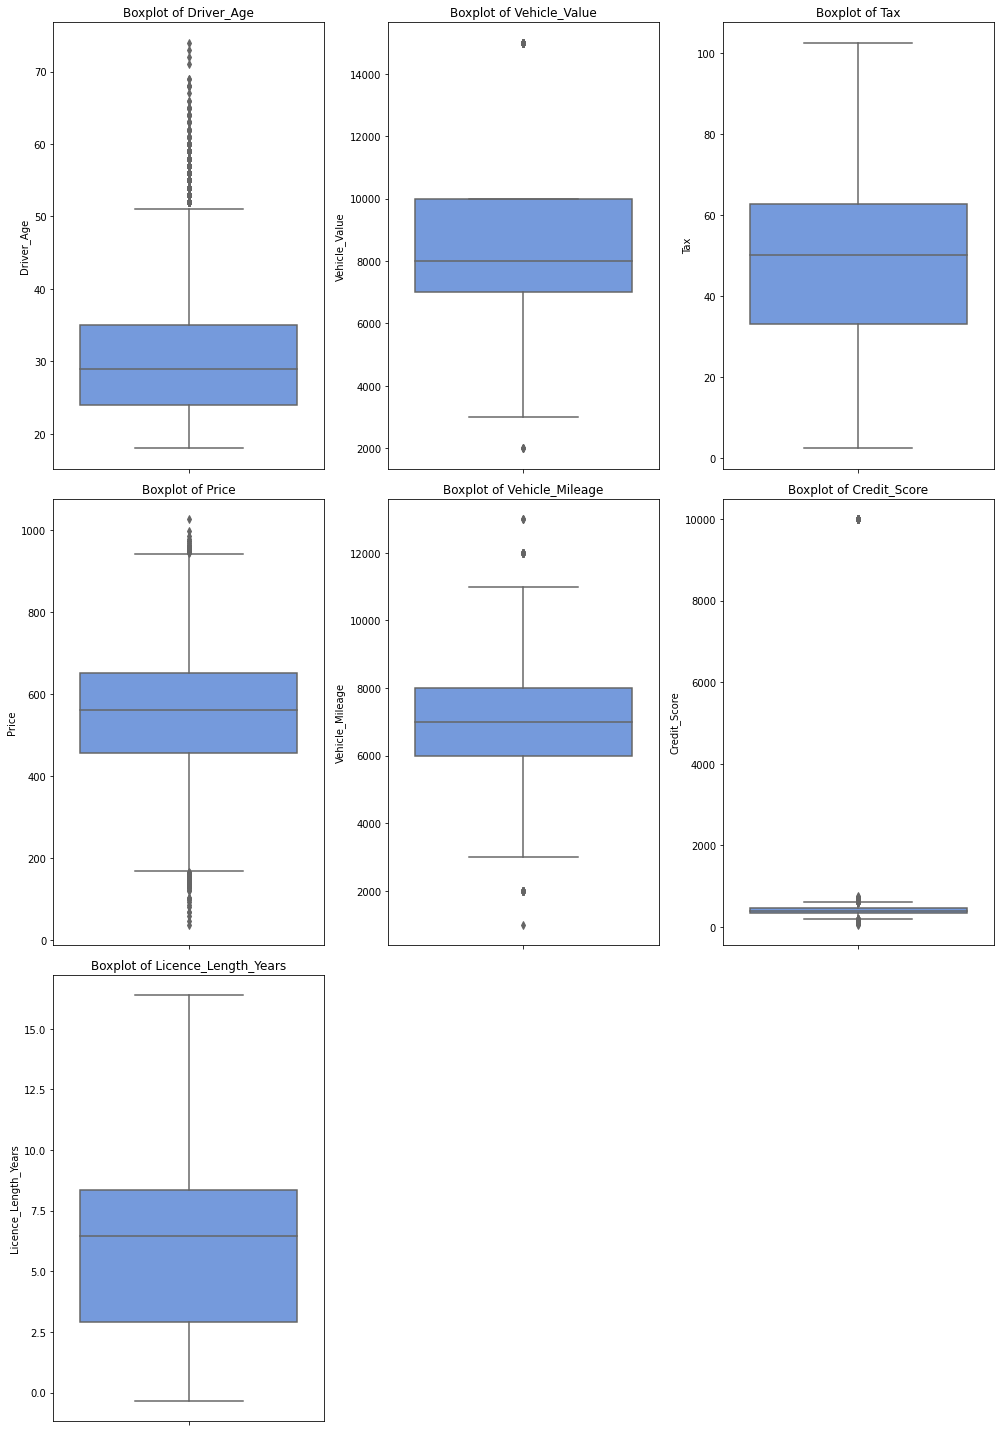

In [13]:
# Generate boxplots for numeric features.

# Function to plot Boxplot of all numeric features in the dataset.
def box_plot(dataset_boxplot):
    plt.figure(figsize=(14,20 ))
    for i in range(0, len(dataset_boxplot.columns)):
        plt.subplot(3, 3, i+1)
        sns.boxplot(y=dataset_boxplot.iloc[:,i],color='cornflowerblue',orient='v')
        plt.title('Boxplot of {}'.format(dataset_boxplot.columns[i]))
        plt.tight_layout()
        
# Plot boxplots for the numeric features in the dataset.
box_plot(numeric_data)    

- Boxplots are used to identify outliers, median, IQR, min and max values.
- The above boxplots of features indicate the presence of outliers for features such as 'Credit_Score', 'Driver_Age', 'Vehicle_Value', 'Price' and 'Vehicle_Mileage'. However, except 'Credit_Score', all other features with outliers are in acceptable range of skewness and the outliers are located close by and hence could be ignored.
- Whereas, 'Credit_Score' consists of outliers present far away from the normal range of 0-999 and has a very high skewness and kurtosis. Hence this could possibly be an issue of wrongly entered data and has to be dealt with before data analysis.

In [14]:
# To find the abnormal credit scores recorded.
data1 = data[data['Credit_Score'] > 999]
data1.shape

(500, 10)

- 500 rows of data had a credit score wrongly entered as 9999.

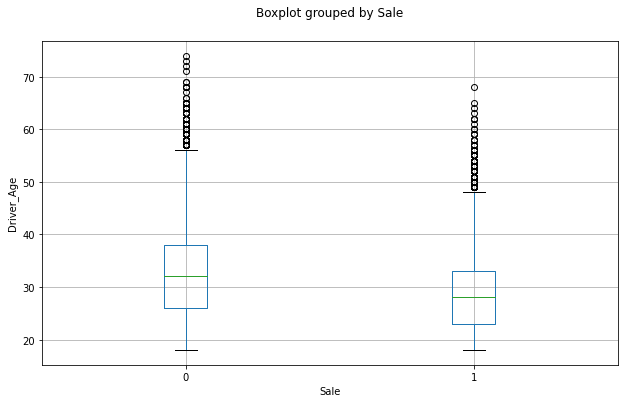

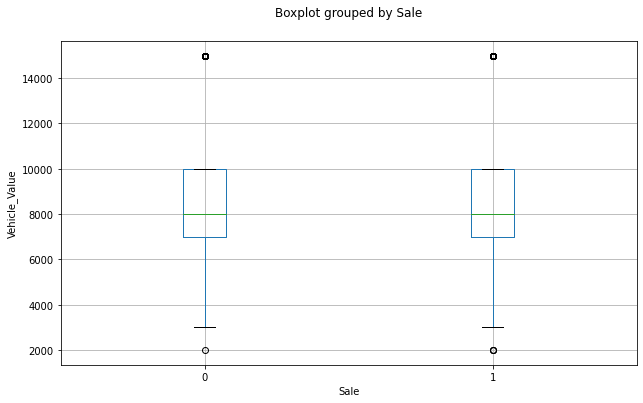

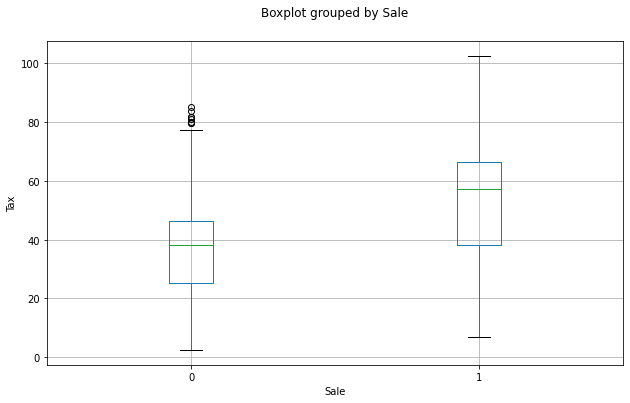

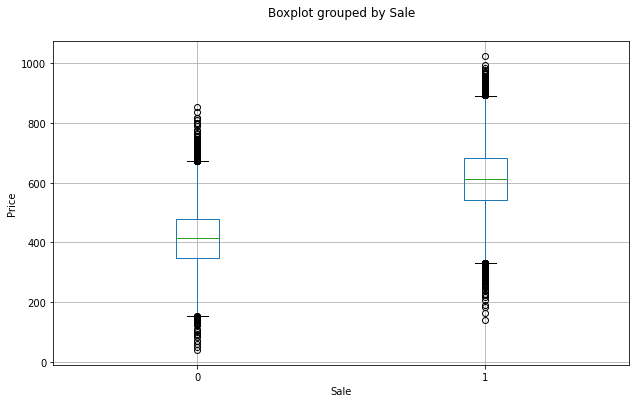

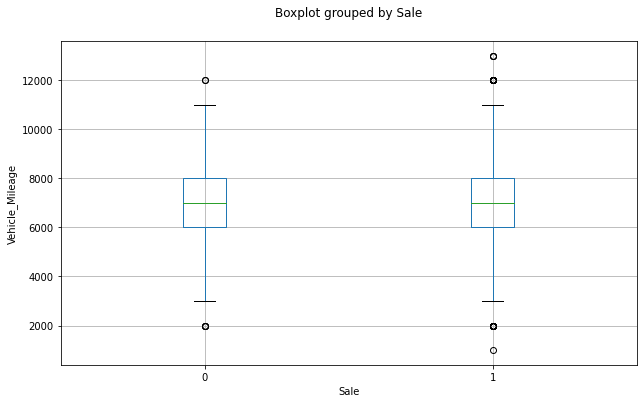

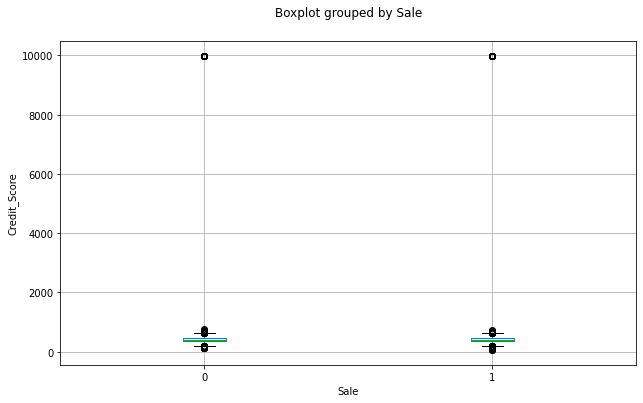

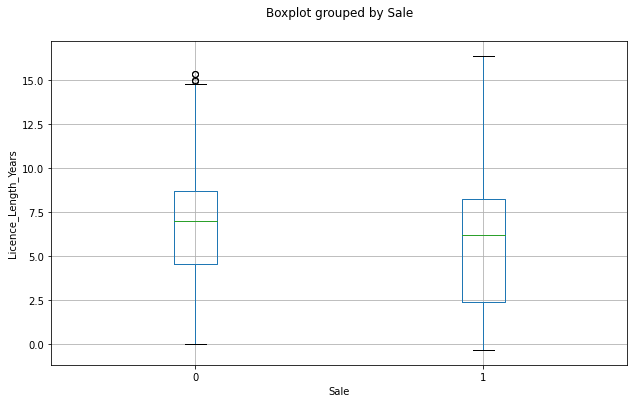

In [15]:
# Visualize the numeric features using boxplots grouped by the target variable, 'Sale'.

for feature in numeric_features:
    data.boxplot(column=feature, by='Sale', figsize=(10,6))
    plt.title(' ')
    plt.ylabel(feature)
    plt.show()

- The above boxplots help to identify the features that best helps to distinguish between the target labels.
- It is noted that 'Price' is the feature that could contribute the most to the prediction of Sales and it clearly differentiates 'Sale' 0 and 'Sale' 1.
- 'Driver_Age', 'Tax' and 'Licence_Length_Years' are the other features that could partially help is differentiating the 'Sale' labels.
- Features, 'Vehicle_Value' and 'Vehicle_Mileage' does not seem to be of much use in 'Sale' prediction.

#### Histograms

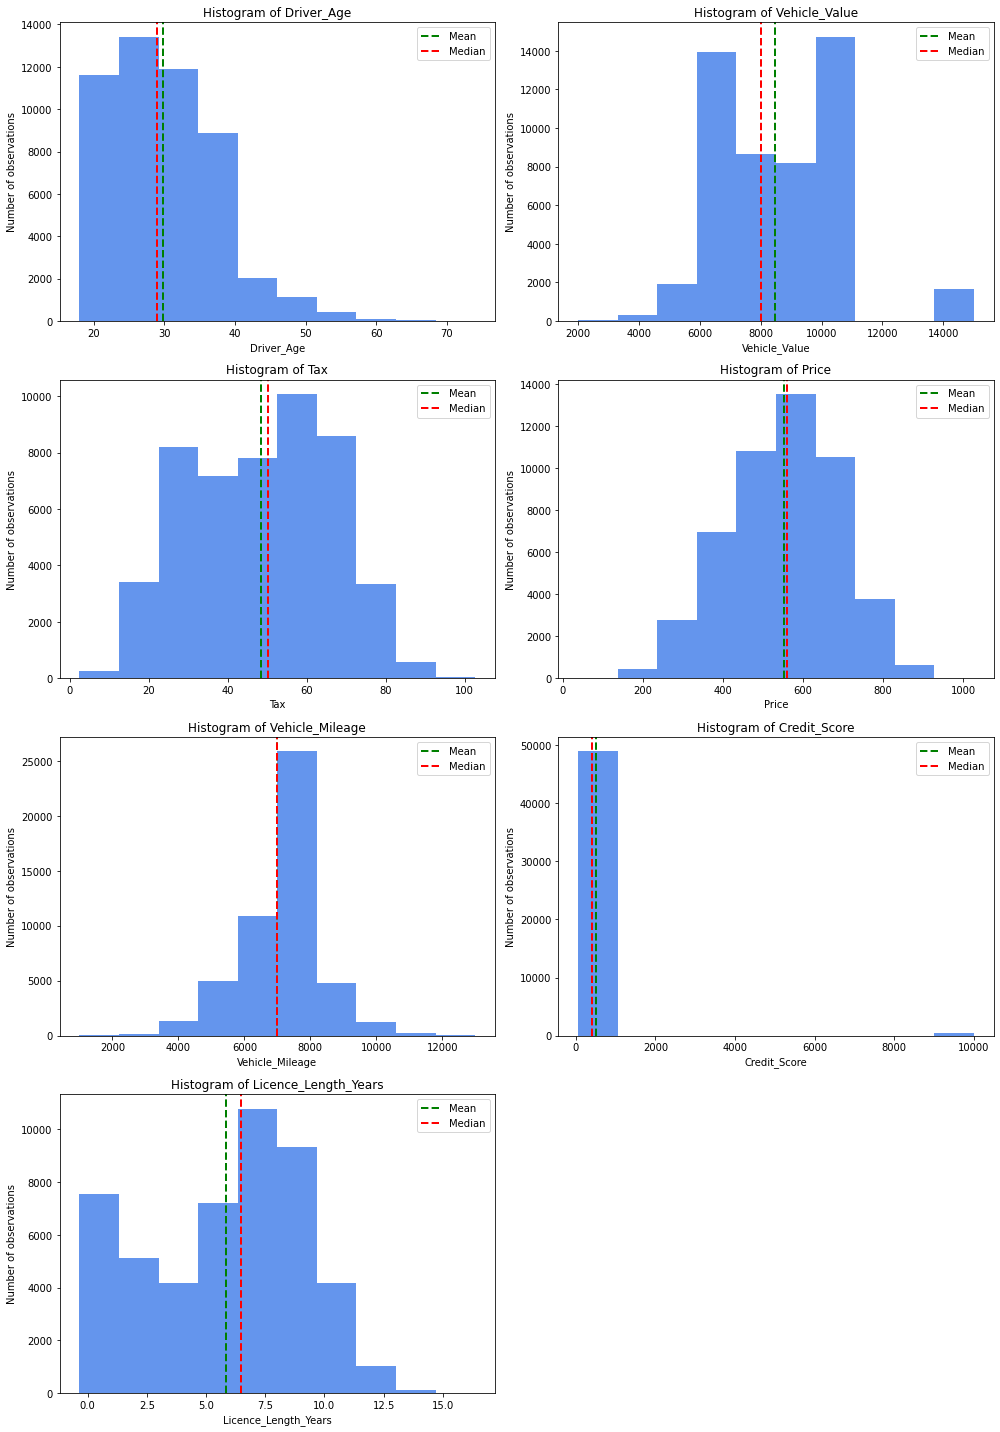

In [16]:
# Generate histograms for numeric features.

# Function to plot Histogram of all numeric features in the dataset.
def hist(dataset_hist):
    plt.figure(figsize=(14, 20))
    for i in range(0, len(dataset_hist.columns)):
        plt.subplot(4, 2, i+1)
        plt.hist(x=dataset_hist.iloc[:,i], color='cornflowerblue')
        # To mark the mean and median in the plot.
        plt.axvline(x=dataset_hist.iloc[:,i].mean(), color = 'green', linestyle='dashed', linewidth = 2, label = 'Mean')
        plt.axvline(x=dataset_hist.iloc[:,i].median(), color = 'red', linestyle='dashed', linewidth = 2, label = 'Median')
        plt.xlabel(dataset_hist.columns[i])
        plt.ylabel('Number of observations')
        plt.title('Histogram of {}'.format(dataset_hist.columns[i]))
        plt.legend()
        plt.tight_layout()
        
# Plot Histograms of the numeric features in the dataset with mean and median marked.
hist(numeric_data)

- Histograms are used to identify the data distribution, to detect outliers, skewness etc.
- Above histograms indicate that feature 'Credit_Score' is very highly right skewed. 
- 'Driver_Age' and 'Vehicle_Value' are moderately right skewed.
- 'Credit_Score' is very highly peaked and 'Driver_Age' is highly peaked as well.
- Mean and Median values are highlighted using dashed lines in green and red colours respectively.

#### Density Plots

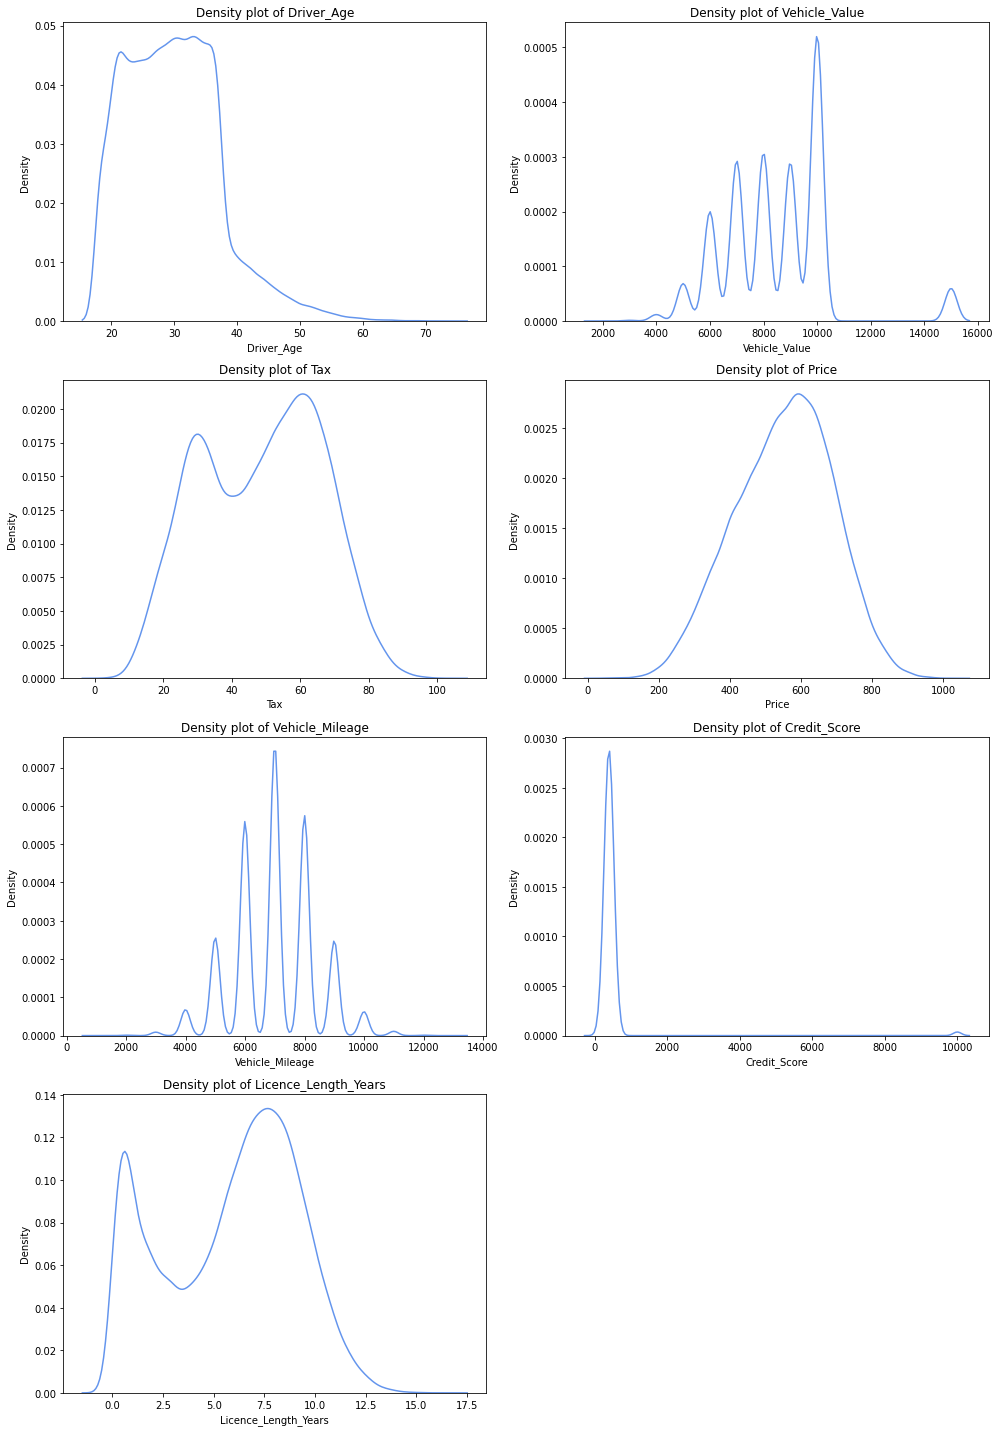

In [17]:
# Generate density plots for numeric features.

# Function to plot Density plot of all numeric features in the dataset.
def density_plot(dataset_density):
    plt.figure(figsize=(14, 20))
    for i in range(0, len(dataset_density.columns)):
        plt.subplot(4, 2, i+1)
        sns.kdeplot(x=dataset_density.iloc[:,i], color='cornflowerblue')
        plt.xlabel(dataset_density.columns[i])
        plt.title('Density plot of {}'.format(dataset_density.columns[i]))
        plt.tight_layout()
        
# Plot Density plots of the numeric features in the dataset.
density_plot(numeric_data)

- Density plots are smooth or continuous versions of histograms that are used to understand the density of data distribution.
- It again indicates an abnormal data distribution for the feature 'Credit_Score'.

#### Countplots, Barplots and Piecharts

#### Graphical Analysis of Target 'Sale'  

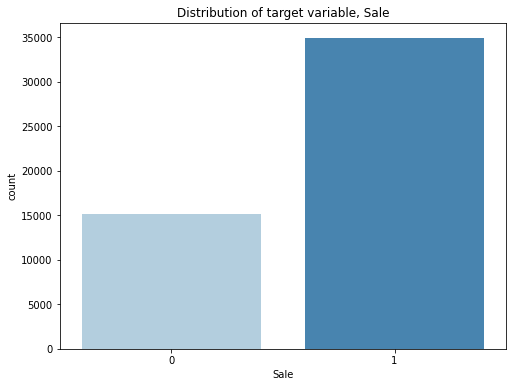

In [18]:
# Countplot to visualize the target variable, 'Sale'.

plt.figure(figsize=(8, 6))
sns.countplot(x=target['Sale'], palette='Blues')
plt.title('Distribution of target variable, Sale')
plt.show()

- The above count plot represents the distribution of target variable, 'Sale'.
- This is a binary classification problem as the target variable, 'Sale' has two labels - 0 and 1.
- It indicates that the dataset has a high target class imbalance which has to be dealt with before data analysis to avoid bias in predictions and to improve the prediction accuracy.
- The number of entries for 'Sale' target variable with value 1 is more than twice the number of entries with value 0, which indicates a relatively good quote sales made by the insurance company.

#### Graphical Analysis of Categorical Feature 'Marital_Status'  

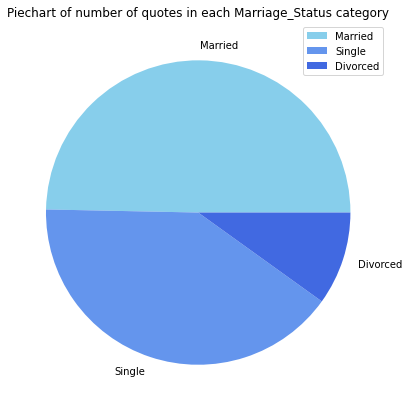

In [19]:
# Piechart to plot the number of quotes generated in each 'Marital_Status' category.

plt.figure(figsize=(7, 7))
labels_pie = ['Married', 'Single', 'Divorced']
colors_pie = ['skyblue', 'cornflowerblue', 'royalblue']
plt.pie(marital_status_counts, labels = labels_pie, colors = colors_pie)
plt.title('Piechart of number of quotes in each Marriage_Status category')
plt.legend()

- The above pie chart indicates that 'Married' category has the highest number of quotes followed by 'Single' category. 'Divorced' category holds the least number of quotes.

Marital status wise sale counts are given below: 
 Marital_Status  Sale
D               0        1530
                1        3382
M               0        7391
                1       17205
S               0        6049
                1       13955
Name: Marital_Status, dtype: int64


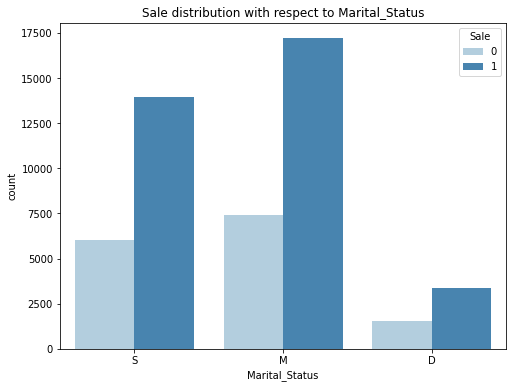

In [20]:
# 'Sale' distribution with respect to the feature variable, 'Marital_Status'

# Group by 'Marital_Status' and 'Sale' to show the sale counts.
marital_status_sale_count = data['Marital_Status'].groupby([data['Marital_Status'], data['Sale']]).count()
print ('Marital status wise sale counts are given below: \n', marital_status_sale_count)

# Countplot for 'Sale' distribution with respect to 'Marital_Status'.
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital_Status', hue='Sale', palette='Blues', data=data)
plt.title('Sale distribution with respect to Marital_Status')
plt.show()

- The above countplot shows the target variable, 'Sale' distribution with respect to the feature variable, 'Marital_Status'.
- Majority of the quotes were generated for married closely followed by single. The least number of quotes were generated for divorced which is considerably lower.
- However, the conversion rate of quotes to purchase is almost the same for all the 'Marriage_Status' categories at around 69 %.

#### Graphical Analysis of Categorical Feature 'Date'  

Yearly sale counts are given below: 
 Date  Sale
2015  0        7617
      1       17545
2016  0        7484
      1       17354
Name: Date, dtype: int64


Text(0, 0.5, 'count')

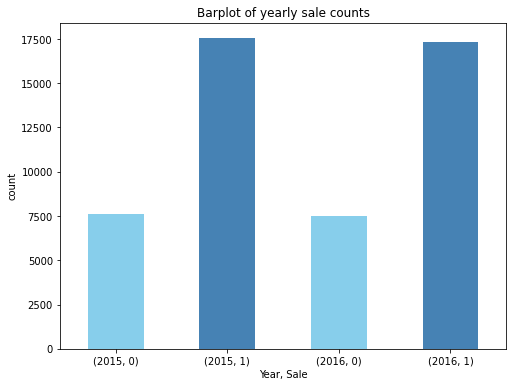

In [21]:
# Generate a barplot to visualize the yearly sale counts.

# Convert the 'Date' format to datetime64.
data['Date'] = data['Date'].astype('datetime64')

# Group 'Date' by year and 'Sale' to show the yearly sale counts.
year_sale_count = data['Date'].groupby([data['Date'].dt.year, data['Sale']]).count()
print ('Yearly sale counts are given below: \n', year_sale_count)

# Barplot of yearly 'Sale' counts. 
plt.figure(figsize=(8, 6))
year_sale_count.plot.bar(color=('skyblue', 'steelblue'))
plt.title('Barplot of yearly sale counts')
plt.xlabel('Year, Sale')
plt.xticks(rotation=0)
plt.ylabel('count')

- The above barplot represents the yearly 'Sale' counts.
- It indicates that both in 2015 and 2016, the number of quotes generated and those that resulted in a purchase are nearly the same.

Year-wise monthly sale counts are given below: 
 Date  Date  Sale
2015  1     0        791
            1       1816
      2     0        547
            1       1284
      3     0        647
            1       1477
      4     0        610
            1       1391
      5     0        698
            1       1422
      6     0        570
            1       1408
      7     0        665
            1       1479
      8     0        686
            1       1517
      9     0        565
            1       1433
      10    0        619
            1       1432
      11    0        623
            1       1435
      12    0        596
            1       1451
2016  1     0        654
            1       1540
      2     0        617
            1       1363
      3     0        620
            1       1416
      4     0        600
            1       1428
      5     0        651
            1       1475
      6     0        606
            1       1366
      7     0        607
         

Text(0, 0.5, 'count')

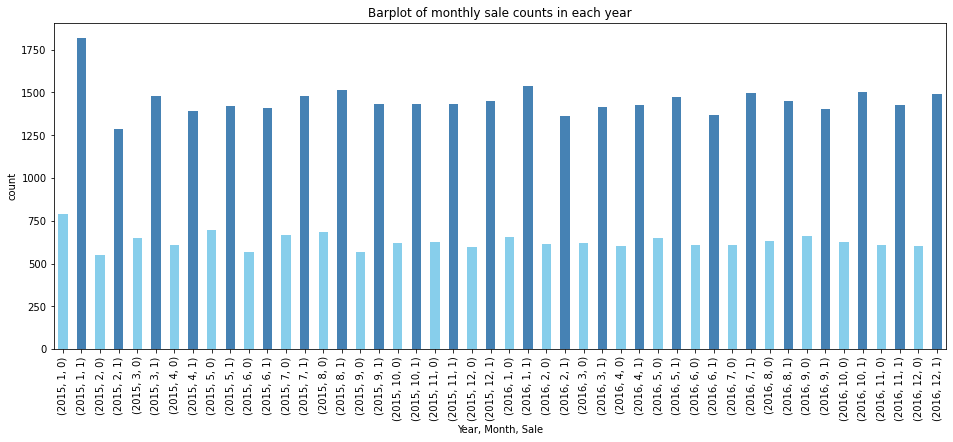

In [22]:
# Generate a barplot to visualize the monthly sale counts in each year.

# Group 'Date' by year, month and 'Sale' to show the monthly sale counts in each year.
monthly_sale_count = data['Date'].groupby([data['Date'].dt.year, data['Date'].dt.month, data['Sale']]).count()
print ('Year-wise monthly sale counts are given below: \n', monthly_sale_count)

# Barplot of monthly 'Sale' counts in 2015-2016.
plt.figure(figsize=(16, 6))
monthly_sale_count.plot.bar(color=('skyblue', 'steelblue'))
plt.title('Barplot of monthly sale counts in each year')
plt.xlabel('Year, Month, Sale')
plt.ylabel('count')

- The above barplot represents the monthly 'Sale' counts in 2015 and 2016.
- It indicates that in all months of 2015 and 2016, the number of quotes generated and those that resulted in a purchase are nearly the same. No significant variations were observed except for a slightly higher number of quotes and corresponding purchases in January, 2015.
- The rate of quotes being converted to purchases also remain nearly same over all the months, which means that there is no significant seasonal variations observed in 'Sale'.

#### Graphical Analysis of Numerical Feature 'Price'  

In [23]:
# Add a new variable to include the 'Price_Range' by converting 'Price' to bins - Low, Medium, High and Very High.
data['Price_Range'] = pd.cut(data.Price,bins=[0,250,500,750,2000],labels=['Low','Medium','High','Very High'])
data.head()

,Driver_Age,Vehicle_Value,Tax,Price,Vehicle_Mileage,Credit_Score,Licence_Length_Years,Date,Marital_Status,Sale,Price_Range
0,56.0,8000.0,28.163417,563.268338,9000.0,358.945535,4.635140,2015-01-01,S,0,High
1,41.0,5000.0,12.652659,253.053188,8000.0,552.668993,7.137831,2015-01-01,M,0,Medium
2,33.0,7000.0,17.939741,358.794829,8000.0,438.785405,9.027053,2015-01-01,M,0,Medium
3,37.0,6000.0,12.907017,258.140333,7000.0,329.121934,8.873923,2015-01-01,M,0,Medium
4,21.0,8000.0,19.335872,386.717436,6000.0,519.575170,0.927578,2015-01-01,M,0,Medium


In [24]:
# Get the number of entries for each price range.
price_range_counts = data['Price_Range'].value_counts()
price_range_counts

High         29198
Medium       16394
Very High     3259
Low            653
Name: Price_Range, dtype: int64

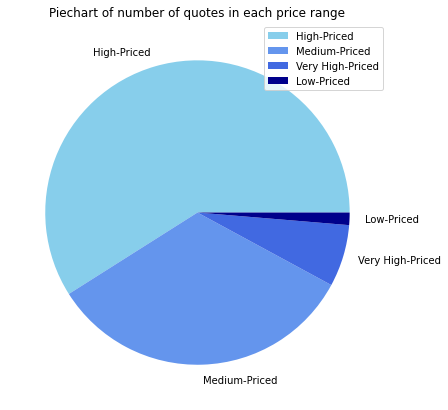

In [25]:
# Piechart to plot the number of quotes generated in each price range.

plt.figure(figsize=(7, 7))
labels_pie = ['High-Priced', 'Medium-Priced', 'Very High-Priced', 'Low-Priced']
colors_pie = ['skyblue', 'cornflowerblue', 'royalblue', 'darkblue']
plt.pie(price_range_counts, labels = labels_pie, colors = colors_pie)
plt.title('Piechart of number of quotes in each price range')
plt.legend()

- The above pie chart indicates that most quotes are generated with a 'High' price followed by 'Medium' price and 'Very High' price. The least number of quotes are generated with a 'Low' price.

Price range wise sale counts are given below: 
 Price_Range  Sale
Low          0         640
             1          13
Medium       0       11611
             1        4783
High         0        2684
             1       26514
Very High    0          15
             1        3244
Name: Price_Range, dtype: int64


Text(0, 0.5, 'count')

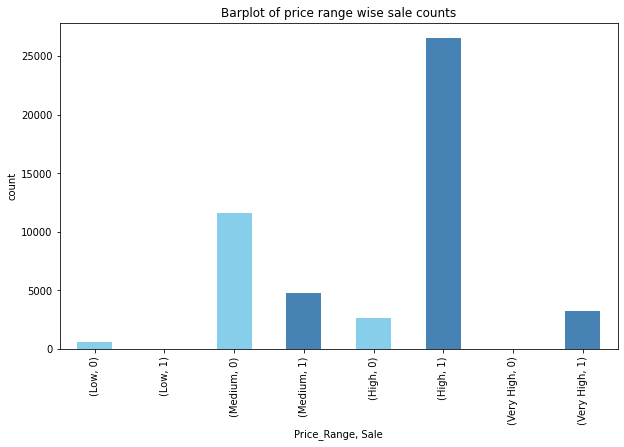

In [26]:
# Barplot to visualize price range wise sale counts.

# Group by 'Price_Range' and 'Sale' to show the respective counts.
price_range_sale_count = data['Price_Range'].groupby([data['Price_Range'], data['Sale']]).count()
print ('Price range wise sale counts are given below: \n', price_range_sale_count)

# Barplot for price range wise 'Sale' counts.
plt.figure(figsize=(10, 6))
price_range_sale_count.plot.bar(color=('skyblue', 'steelblue'))
plt.title('Barplot of price range wise sale counts')
plt.xlabel('Price_Range, Sale')
plt.ylabel('count')

- The above batplot represents the sales in different price ranges as defined using a new variable, 'Price_Range'
Low: (0 250]
Medium: (250 500]
High: (500 750]
Very High: (750 2000]
- Most number of quotes were generated with a 'Price_Range' of 'High' at 29198 followed by 'Medium' at 16394 followed by 'Very High' at 3259 followed by 'Low' at 653. The number of quotes generated with 'Very High' and 'Low' price range is significantly lower compared to the others.
- However, the conversion rate of quotes to purchases is as indicated below:
Low: 1.99 %
Medium: 29.17 %
High: 90.80 %
Very High: 99.53 %
- This indicates that the highest conversion rate is for 'Very High' and 'High' price ranges, both above 90 %. Hence more attention could be given to such insurance quotes.
- In conclusion, considering the number of entries and the conversion rate, it is best to concentrate on policies with 'High' price range (500 750] to improve business and targetted marketing approaches could be made to customers for whom quotes are generated within a price range of (0 500] and appropriate pricing changes could be made.

#### Feature Importance (Mutual Information)

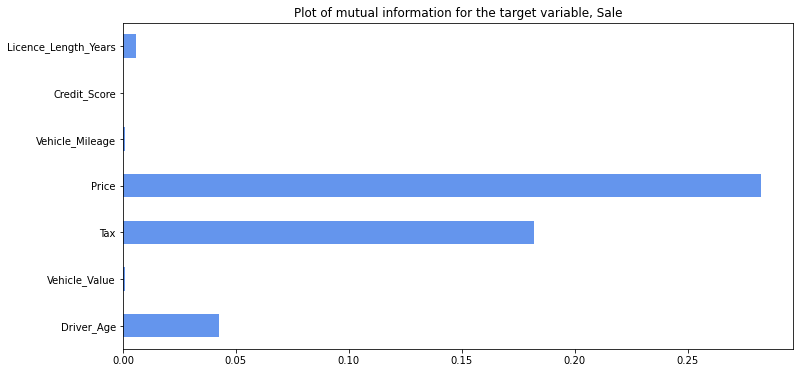

In [27]:
# Plot the feature importances using mutual information for the target variable, 'Sale'.

# Separate the data into numerical features and target after removing the NaN/ inf values.
data_new = data.drop(columns=['Date', 'Marital_Status', 'Price_Range'])
data_new = data_new[np.isfinite(data_new).all(axis=1)]

# Features.
features_new = data_new.drop(columns='Sale')
# Target.
target_new = data_new['Sale']

# Plot the feature importances.
plt.figure(figsize=(12,6))
importances = mutual_info_classif(features_new, target_new)
feature_importances = pd.Series(importances, data_new.columns[0:len(data_new.columns)-1])
feature_importances.plot(kind = 'barh', color = 'cornflowerblue')
plt.title('Plot of mutual information for the target variable, Sale')
plt.show()

- The above plot of feature importances indicates that 'Price' is the most important feature, followed by 'Tax', 'Driver_Age' and 'Licence_Length_Years' in order based on the mutual information for the target variable, 'Sale'.
- 'Vehicle_Mileage' and 'Vehicle_Value' are found to be the less important features.
- The feature 'Credit_Score' seems to be not important at all in predicting the target variable, 'Sale'.

#### Pairplot

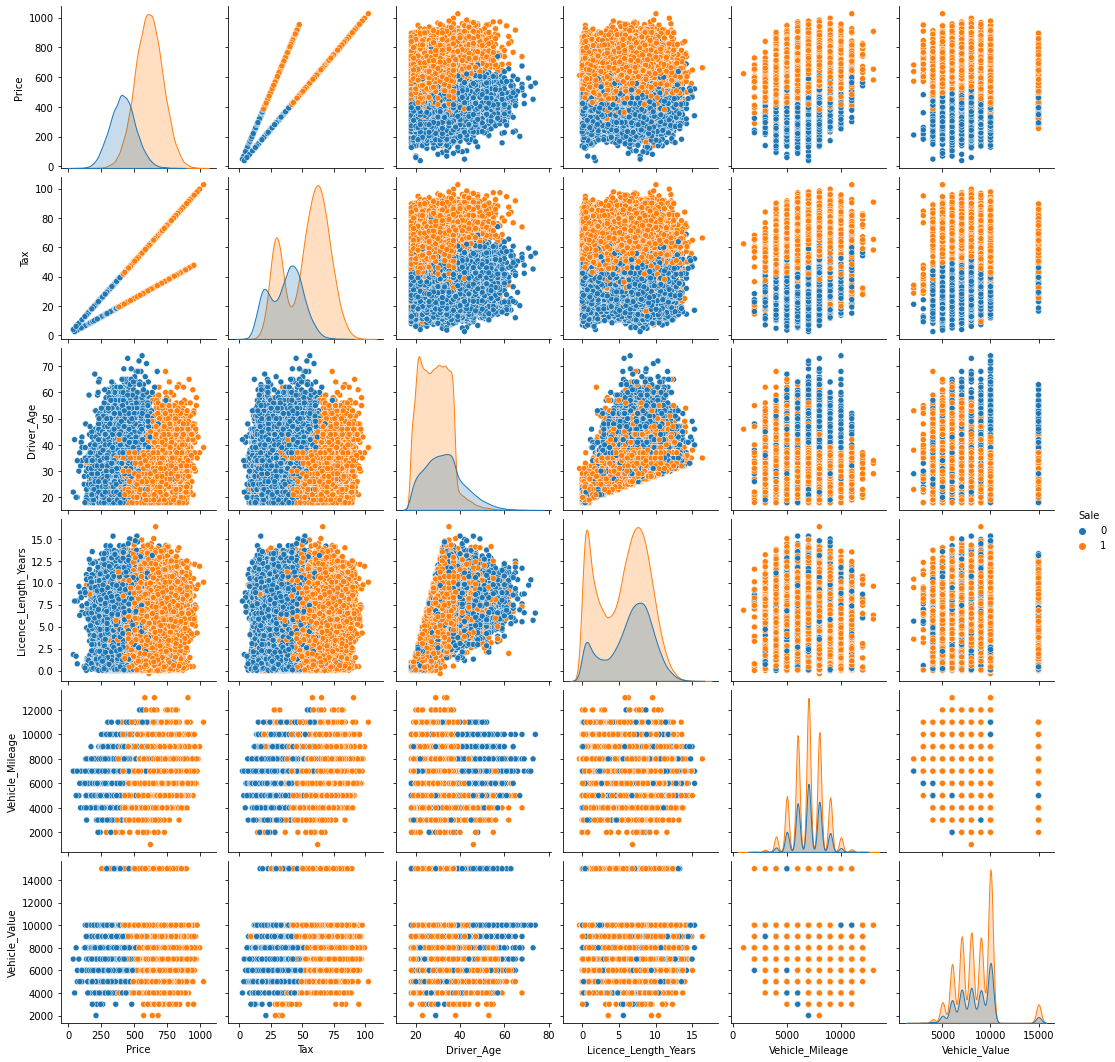

In [28]:
# Plot a pairplot to visualize the relation between the features and with the target, 'Sale'.

# Identify the important variables required for the pairplot from the above plot of feature importances.
imp_variables = ['Price', 'Tax', 'Driver_Age', 'Licence_Length_Years', 'Vehicle_Mileage', 'Vehicle_Value', 'Sale']
data_pairplot = data[imp_variables]

# Plot the pairplot with hue 'Sale'.
sns.pairplot(data_pairplot, hue='Sale')

- The above pairplots indicate the relation between numerical feature pairs using scatter plots and the plots along the diagonal indicates the univariate distribution plots.
- Features 'Price' and 'Tax' together and in pairs with all other above numeric features help to well differentiate the data points with respect to target, 'Sale'.

#### Correlation Map

Text(0.5, 1.0, 'Correlation map of variable correlations')

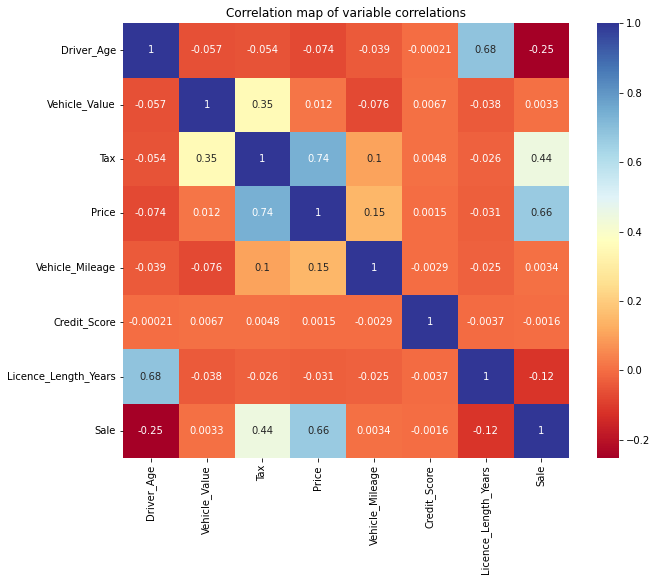

In [29]:
# Correlation Map to obtain correlations of each variables in the dataset.

# To obtain correlation data.
correlation_matrix = data.corr()

# To plot correlation heatmap.
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='RdYlBu')
plt.title('Correlation map of variable correlations')

- Correlation map indicates the feature to feature and feature to target correlations in graphical form. 
- It is observed that the feature, 'Price' is most correlated to the target variable, 'Sale' and hence is the best feature that could be used for prediction.
- 'Tax', 'Driver_Age' and 'Licence_Length_Years' are also useful features that could help in 'Sale' prediction based on their correlation values to the target, 'Sale'.
- However, 'Price' and 'Tax' are highly correlated to each other at 0.74. Similarly, 'Driver_Age' and 'Licence_Length_Years' are highly correlated at 0.68. These feature pairs could be considered as redundant and the one from each pair that is least correlated to the target, 'Sale' could be removed during modelling for better results.

## Modelling - Binary Classification

In [30]:
# Import the required libraries.

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from collections import Counter

In [31]:
# Import the required libraries for the classifiers used.

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

### Outlier Treatment

In [32]:
# Take a copy of the dataset to work on.
dataset = data.copy()

# Replace the outlier value '9999' present in 'Credit_Score' by '999' as normal credit score range is 0 to 999.
dataset['Credit_Score'] = dataset['Credit_Score'].replace([9999], 999)

# To find the abnormal credit scores recorded.
data2 = dataset[dataset['Credit_Score'] > 999]
data2.shape

(0, 11)

- This indicates that there are no rows with credit score greater than 999. Hence outliers in 'Credit_Score' are dealt with.

In [33]:
# To find the skewness and kurtosis of 'Credit_Score' after outlier treatment.
print ('Skewness of Credit_Score after outlier treatment is',  np.round(dataset['Credit_Score'].skew(), decimals=4))
print ('Kurtosis of Credit_Score after outlier treatment is',  np.round(dataset['Credit_Score'].kurt(), decimals=4))

Skewness of Credit_Score after outlier treatment is 2.0214
Kurtosis of Credit_Score after outlier treatment is 11.0499


- Since the skewness and kurtosis of 'Credit_Score' are still not in acceptable range, Boxplot (IQR) method could be used to further treat the outliers.

In [34]:
# Boxplot (IQR) method to treat outliers.

# First and third quantiles are calculated.
Q1, Q3 = dataset.Credit_Score.quantile([0.25, 0.75]).values

# Upper and lower limits to treat outliers are defined.
upper_limit = Q3 + 3 * (Q3 - Q1)
lower_limit = Q1 - 3 * (Q3 - Q1)

# Outliers beyond the upper and lower limits are replaced by upper and lower limits respectively.
dataset.Credit_Score = np.clip(dataset.Credit_Score, lower_limit, upper_limit)

# To find the skewness and kurtosis of 'Credit_Score' after outlier treatment by IQR method.
print ('Skewness of Credit_Score after outlier treatment is',  np.round(dataset['Credit_Score'].skew(), decimals=4))
print ('Kurtosis of Credit_Score after outlier treatment is',  np.round(dataset['Credit_Score'].kurt(), decimals=4))

Skewness of Credit_Score after outlier treatment is 0.6832
Kurtosis of Credit_Score after outlier treatment is 2.4552


Text(0.5, 1.0, 'Boxplot of Credit_Score after outlier treatment')

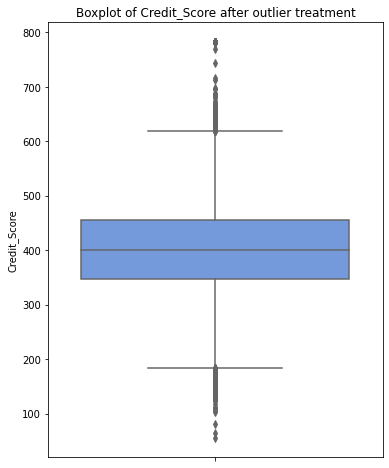

In [35]:
# Boxplot of 'Credit_Score' after outlier treatment by IQR method'.

plt.figure(figsize=(6, 8))
sns.boxplot(y=dataset['Credit_Score'],color='cornflowerblue',orient='v')
plt.title('Boxplot of Credit_Score after outlier treatment')

- Boxplot (IQR) method was used to deal with the extreme outlier values in 'Credit_Score' feature. Skewness and kurtosis of this feature is now in acceptable range.

Text(0, 0.5, 'Credit_Score')

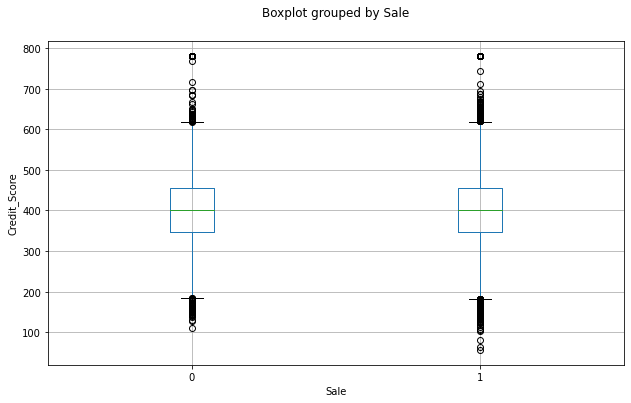

In [36]:
# Boxplot of 'Credit_Score' grouped by the target variable after outlier treatment by IQR method'

dataset.boxplot(column='Credit_Score', by='Sale', figsize=(10,6))
plt.title(' ')
plt.ylabel('Credit_Score')

- Above boxplot indicates that 'Credit_Score' is not a very useful feature in differentiating the target variable, 'Sale'.

In [37]:
# Divide the dataset into features, X and target, y.

# Target.
y = dataset['Sale']

# Features.
X = dataset[dataset.columns[0:9]]
# Remove the feature, 'Date' from the features as it is less informative from the analysis performed earlier.
X = X.drop(columns='Date')
print ('Features are:')
X.head()

Features are:


,Driver_Age,Vehicle_Value,Tax,Price,Vehicle_Mileage,Credit_Score,Licence_Length_Years,Marital_Status
0,56.0,8000.0,28.163417,563.268338,9000.0,358.945535,4.635140,S
1,41.0,5000.0,12.652659,253.053188,8000.0,552.668993,7.137831,M
2,33.0,7000.0,17.939741,358.794829,8000.0,438.785405,9.027053,M
3,37.0,6000.0,12.907017,258.140333,7000.0,329.121934,8.873923,M
4,21.0,8000.0,19.335872,386.717436,6000.0,519.575170,0.927578,M


### Train-Test Split

In [38]:
# Split the dataset into train, validation and test sets in the ratio 3:1:1.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train)

# To print the size of train sets.
print ("The size of train sets are:\n", X_train.shape, y_train.shape)  

# To print the size of validation sets.
print ("The size of validation sets are:\n", X_val.shape, y_val.shape)  

# To print the size of test sets.
print ("The size of test sets are:\n", X_test.shape, y_test.shape)       

The size of train sets are:
 (30000, 8) (30000,)
The size of validation sets are:
 (10000, 8) (10000,)
The size of test sets are:
 (10000, 8) (10000,)


### Model Comparison using Cross Validation Scores

In [39]:
# Define the dictionary of models to be compared.
models_used = []
models_used.append(('Decision Tree', DecisionTreeClassifier()))
models_used.append(('K-Nearest Neighbor', KNeighborsClassifier()))
models_used.append(('Gaussian Naive Bayes', GaussianNB()))
models_used.append(('Logistic Regression', LogisticRegression()))
models_used.append(('Support Vector Machine', SVC()))
models_used.append(('Random Forest', RandomForestClassifier()))
models_used.append(('Bagging Classifier', BaggingClassifier()))
models_used.append(('Gradient Boosting', GradientBoostingClassifier()))
models_used.append(('AdaBoost', AdaBoostClassifier()))
models_used.append(('XGBoost', XGBClassifier()))
models_used.append(('CatBoost', CatBoostClassifier()))
models_used.append(('LightGBM', LGBMClassifier()))

# Take copy of X and y of train set.
Xtrain1 = X_train.copy()
ytrain1 = y_train.copy()

# Fetch the numerical features.
numerical_features = Xtrain1.select_dtypes([np.number]).columns

# Pipeline for numerical features with imputer and scaler.
numerical_transformer = Pipeline(steps=[('imputer', IterativeImputer(estimator=LinearRegression(), missing_values=np.nan)), # Iterative Imputer to deal with missing values.
                                        ('scaler', MinMaxScaler())]) # MinMaxScaler for normalization of numeric features.

# Fetch the categorical features.
categorical_features = Xtrain1.select_dtypes(exclude=[np.number]).columns

# Pipeline for categorical features with encoder.
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))]) # OneHotEncoder to encode the categoric variables.

# Column transformer to combine categorical and numerical pipelines.
preprocessor = ColumnTransformer(transformers=[('numerical', numerical_transformer, numerical_features),
                                               ('categorical', categorical_transformer, categorical_features)])

# Tabulate the results obtained for each model.
table = []
for model_name, model in models_used:
    # Create the pipeline for model training that includes preprocessor, feature selector, oversampler and classifier model.
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), # Data preprocessing.
                               ('feature_selection', SelectKBest(score_func=f_classif, k='all')), # ANOVA F method for feature selection.
                               ('smote', SMOTE(random_state=11)), # SMOTE Oversampler to resolve target class imbalance.
                               ('model', model)]) # Model used in classification.    
    # Determine the cross validation scores for the model.
    # Accuracy score.
    Accuracy_Score = cross_val_score(pipeline, Xtrain1, ytrain1, scoring='accuracy', cv=10, n_jobs=-1)
    # F1-score.
    F1_Score = cross_val_score(pipeline, Xtrain1, ytrain1, scoring='f1', cv=10, n_jobs=-1)
    table.append([model_name, Accuracy_Score.mean(), F1_Score.mean()])
    
# Print the results.
print(tabulate(table, headers=['Model', 'Accuracy Score', 'F1-Score']))

Model                     Accuracy Score    F1-Score
----------------------  ----------------  ----------
Decision Tree                   0.826167    0.873576
K-Nearest Neighbor              0.8396      0.880277
Gaussian Naive Bayes            0.8262      0.867404
Logistic Regression             0.8606      0.89588
Support Vector Machine          0.864133    0.89853
Random Forest                   0.875367    0.909549
Bagging Classifier              0.858733    0.897485
Gradient Boosting               0.8769      0.909806
AdaBoost                        0.866       0.900622
XGBoost                         0.879267    0.913625
CatBoost                        0.883933    0.917233
LightGBM                        0.882833    0.915651


- Best accuracy and f1 scores are exhibited by CatBoost classifier at 88.39 % and 91.72 % respectively. This is closely followed by LightGBM, XGBoost and Gradient Boosting classifiers in order.
- All of the classifiers used here showed reasonably good results with the dataset.
- Since CatBoost is the best model from the above results in terms of both Accuracy and F1 scores, it is used for prediction using the validation set.
- Note: Although feature selection was employed earlier, it did not improve the model performance in any way, hence all the features are used in modelling.

## CatBoost Classifier

### Training of CatBoost Classifier

In [40]:
# Take copy of the train and validation sets.
Xtrain2 = X_train.copy()
ytrain2 = y_train.copy()
Xval2 = X_val.copy()
yval2 = y_val.copy()

# Create the pipeline for model training that includes preprocessor, feature selector, oversampler and CatBoost classifier.
pipeline_catboost = Pipeline(steps=[('preprocessor', preprocessor), # Data preprocessing.
                                    ('feature_selection', SelectKBest(score_func=f_classif, k='all')), # ANOVA F method for feature selection.
                                    ('smote', SMOTE(random_state=11)), # SMOTE Oversampler to resolve target class imbalance.
                                    ('model_catboost', CatBoostClassifier(logging_level='Silent'))]) # CatBoost classifier used in classification.

# Train the model using the training data.
catboost_classifier = pipeline_catboost.fit(Xtrain2, ytrain2)

# Print the parameters of the model used in training.
print ('The parameters of the CatBoost classifier used in training are: \n')
print (pipeline_catboost[3].get_all_params())

The parameters of the CatBoost classifier used in training are: 

{'nan_mode': 'Min', 'eval_metric': 'Logloss', 'iterations': 1000, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'eval_fraction': 0, 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'subsample': 0.800000011920929, 'use_best_model': False, 'class_names': [0, 1], 'random_seed': 0, 'depth': 6, 'posterior_sampling': False, 'border_count': 254, 'classes_count': 0, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'min_data_in_leaf': 1, 'loss_function': 'Loglo

- The parameters of the CatBoost classifier used in training are listed above.

### Prediction using CatBoost Classifier

In [41]:
# Make predictions on the validation data using the trained model.
ypred2 = catboost_classifier.predict(Xval2)

# Prediction of probability in classification.
prob2 = catboost_classifier.predict_proba(Xval2)

### Evaluate Model Performance of CatBoost Classifier

In [42]:
# Assess the model performance.

# Function to calculate the evaluation metrics of classification.
def model_performance(yval, ypred, prob):
    print('Accuracy:', accuracy_score(yval, ypred))
    print('Precision:', precision_score(yval, ypred))
    print('Recall:', recall_score(yval, ypred))
    print('F1-score:', f1_score(yval, ypred, average='weighted'))
    print('ROC_AUC score:', roc_auc_score(yval, prob))
    print('Classification Report:\n', classification_report(yval,ypred))
    print('Confusion Matrix:\n', confusion_matrix(yval,ypred))  
    
# Call the function for model evaluation.
model_performance(yval2, ypred2, prob2[:, 1])

Accuracy: 0.8849
Precision: 0.9105507818002535
Recall: 0.9260744985673353
F1-score: 0.8842297927518539
ROC_AUC score: 0.9473879485379229
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      3020
           1       0.91      0.93      0.92      6980

    accuracy                           0.88     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Matrix:
 [[2385  635]
 [ 516 6464]]


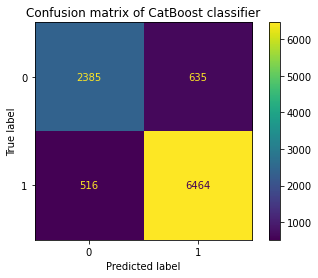

In [43]:
# Plot the confusion matrix generated.

# Function to plot the confusion matrix generated.
def confusion_matrix_display(yval, ypred):
    ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(yval,ypred), display_labels=pipeline_catboost.classes_).plot()
    plt.title('Confusion matrix of CatBoost classifier')
    plt.show() 
    
# Call the function to plot the confusion matrix.
confusion_matrix_display(yval2, ypred2)

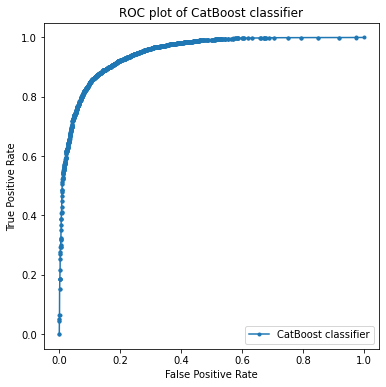

In [44]:
# Plot the ROC curve

# Function to plot the ROC curve.
def roc_curve_plot(yval, prob):
    plt.figure(figsize=(6, 6))
    fpr, tpr, _ = roc_curve(yval, prob)
    plt.plot(fpr, tpr, marker='.', label='CatBoost classifier')
    plt.title('ROC plot of CatBoost classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Call the function to plot the ROC curve.
roc_curve_plot(yval2, prob2[:, 1])

- The results obtained for CatBoost classifier are reasonably good with an accuracy of 88.49 % and a weighted f1-score of 88.42 %. The other evaluation metrics and plots used for classification are represented above.
- Hyperparameter Tuning could be performed to check if the model performance improves any further.

### Hyperparameter Tuning and Training of CatBoost Classifier

In [45]:
# Perform hyperparameter tuning of the CatBoost classifier to improve the performance.

# Take copy of the train and validation sets.
Xtrain3 = X_train.copy()
ytrain3 = y_train.copy()
Xval3 = X_val.copy()
yval3 = y_val.copy()

# Define the dictionary of parameters of the CatBoost Classifier model to evaluate.
param_values = {'model_catboost__iterations': [100, 500, 1000, 2000], 
                'model_catboost__learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06],
                'model_catboost__depth': [4, 5, 6, 7, 8], 
                'model_catboost__l2_leaf_reg': [1, 2, 3, 4, 5],
                'model_catboost__min_data_in_leaf': [1, 2, 3, 4, 5],
                'model_catboost__boosting_type': ['Ordered', 'Plain'],
                'model_catboost__bootstrap_type': ['Bayesian', 'Bernoulli', 'MVS'],
                'model_catboost__logging_level': ['Silent']}

# Initialize Randomized Search CV for hyperparameter tuning.
random_search = RandomizedSearchCV(pipeline_catboost, param_values, cv=10, scoring='f1', verbose=False) 

# Training using Random Search applied to the CatBoost classifier.
catboost_random_search = random_search.fit(Xtrain3, ytrain3)

### Prediction using CatBoost Classifier with Hyperparameter Tuning

In [46]:
# Prediction on validation data using the best estimates obtained for CatBoost classifier.
ypred3 = catboost_random_search.best_estimator_.predict(Xval3)

# Prediction of classification probabilities.
prob3 = catboost_random_search.best_estimator_.predict_proba(Xval3)

# To print the best parameters obtained during hyperparameter tuning.
print("The best parameters across all searched param_values are:\n", catboost_random_search.best_params_)

The best parameters across all searched param_values are:
 {'model_catboost__min_data_in_leaf': 3, 'model_catboost__logging_level': 'Silent', 'model_catboost__learning_rate': 0.06, 'model_catboost__l2_leaf_reg': 1, 'model_catboost__iterations': 1000, 'model_catboost__depth': 4, 'model_catboost__bootstrap_type': 'Bayesian', 'model_catboost__boosting_type': 'Ordered'}


- The best parameters obtained for the CatBoost classifier using hyperparameter tuning is listed above.

### Evaluate Model Performance with Hyperparameter Tuning

In [47]:
# Call the function for model evaluation.
model_performance(yval3, ypred3, prob3[:, 1])

Accuracy: 0.8862
Precision: 0.9145614533068408
Recall: 0.9232091690544413
F1-score: 0.8858391215777901
ROC_AUC score: 0.9485469363745043
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      3020
           1       0.91      0.92      0.92      6980

    accuracy                           0.89     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:
 [[2418  602]
 [ 536 6444]]


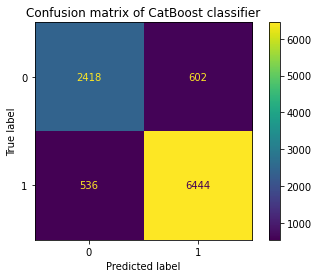

In [48]:
# Call the function to plot the confusion matrix.
confusion_matrix_display(yval3, ypred3)

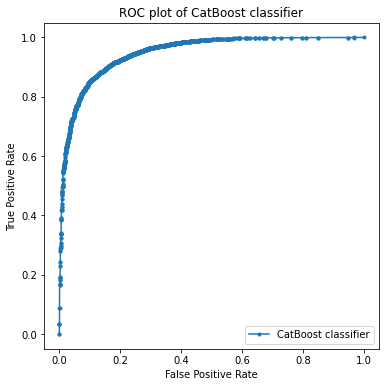

In [49]:
# Call the function to plot the ROC curve.
roc_curve_plot(yval3, prob3[:, 1])

- Hyperparameter tuning is the process in which a dictionary of model parameters are provided to evaluate and compare. The best set of model parameters is used in prediction.
- Hyperparameter tuning had slightly improved the performance of the CatBoost classifier model. The accuracy increased to 88.62 % and weighted F1-score increased to 88.58 %. 
- There is a slight increase in ROC_AUC score as well.
- The other evaluation metrics and plots used for classification are represented above.

### Holdout Validation

In [50]:
# Unbiased prediction on test data using the CatBoost classifier with Random Search.
ypred_holdout = catboost_random_search.best_estimator_.predict(X_test)

# Prediction of classification probabilities.
prob_holdout = catboost_random_search.best_estimator_.predict_proba(X_test)

# Estimation of scores obtained in holdout validation.
# Call the function for model evaluation.
model_performance(y_test, ypred_holdout, prob_holdout[:, 1])

Accuracy: 0.8858
Precision: 0.9195171026156942
Recall: 0.9166189111747851
F1-score: 0.8859170976297494
ROC_AUC score: 0.9460837017780221
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      3020
           1       0.92      0.92      0.92      6980

    accuracy                           0.89     10000
   macro avg       0.86      0.87      0.86     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:
 [[2460  560]
 [ 582 6398]]


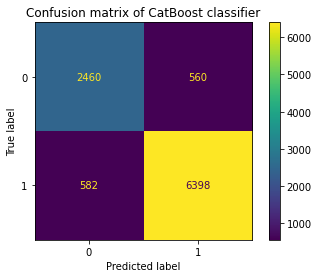

In [51]:
# Call the function to plot the confusion matrix.
confusion_matrix_display(y_test, ypred_holdout)

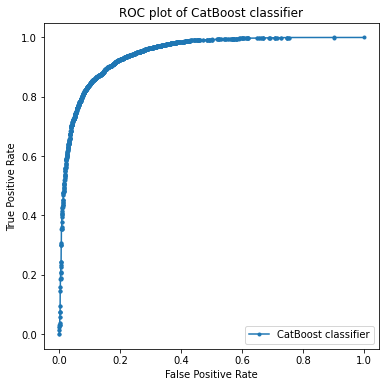

In [52]:
# Call the function to plot the ROC curve.
roc_curve_plot(y_test, prob_holdout[:, 1])

- Holdout validation is a type of cross validation technique used to check how the model performs on unseen data.
- Reasonably good results were obtained with predictions made on unseen data - test data using the hyperparameter tuned CatBoost classifier.
- An accuracy of 88.58 %, weighted F1 score of 88.59 % and an ROC_AUC score of 0.946 was obtained.
- The other evaluation metrics and plots used for classification are represented above.